In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math


In [36]:
df = pd.read_csv('Edmonton_Central_Daily_Readings.csv')
df.head(5)

,IntervalStart,IntervalEnd,Carbon Monoxide(ppm),Methane(ppm),Nitric Oxide(ppm),Nitrogen Dioxide(ppm),Non-methane Hydrocarbons(ppm),Outdoor Air Temperature(deg c),Ozone(ppm),PM2.5 Mass(ug/m3),Total Hydrocarbons(ppm),Total Oxides Of Nitrogen(ppm)
0,01/01/2015 00:00:00,01/01/2015 00:59:00,0.2,2.1,0.0040,0.0190,0.0,3.8,0.021,6.0,2.1,0.0230
1,01/01/2015 01:00:00,01/01/2015 01:59:00,0.2,2.1,0.0047,0.0272,0.0,3.5,0.012,1.0,2.1,0.0319
2,01/01/2015 02:00:00,01/01/2015 02:59:00,0.2,2.3,0.0034,0.0246,0.0,3.4,0.014,0.0,2.3,0.0280
3,01/01/2015 03:00:00,01/01/2015 03:59:00,0.3,2.5,0.0035,0.0281,0.0,3.3,0.019,3.0,2.5,0.0316
4,01/01/2015 04:00:00,01/01/2015 04:59:00,0.1,1.9,0.0010,0.0113,0.0,3.1,0.026,2.0,1.9,0.0123


In [37]:
df.shape

(70872, 12)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70872 entries, 0 to 70871
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IntervalStart                   70872 non-null  object 
 1   IntervalEnd                     70872 non-null  object 
 2   Carbon Monoxide(ppm)            42072 non-null  float64
 3   Methane(ppm)                    40151 non-null  float64
 4   Nitric Oxide(ppm)               50669 non-null  float64
 5   Nitrogen Dioxide(ppm)           50669 non-null  float64
 6   Non-methane Hydrocarbons(ppm)   39232 non-null  float64
 7   Outdoor Air Temperature(deg c)  24530 non-null  float64
 8   Ozone(ppm)                      50659 non-null  float64
 9   PM2.5 Mass(ug/m3)               48863 non-null  float64
 10  Total Hydrocarbons(ppm)         39230 non-null  float64
 11  Total Oxides Of Nitrogen(ppm)   50669 non-null  float64
dtypes: float64(10), object(2)
memory

In [39]:
df['IntervalStart']

0        01/01/2015 00:00:00
1        01/01/2015 01:00:00
2        01/01/2015 02:00:00
3        01/01/2015 03:00:00
4        01/01/2015 04:00:00
                ...         
70867    01/31/2023 19:00:00
70868    01/31/2023 20:00:00
70869    01/31/2023 21:00:00
70870    01/31/2023 22:00:00
70871    01/31/2023 23:00:00
Name: IntervalStart, Length: 70872, dtype: object

In [40]:
df['IntervalEnd']

0        01/01/2015 00:59:00
1        01/01/2015 01:59:00
2        01/01/2015 02:59:00
3        01/01/2015 03:59:00
4        01/01/2015 04:59:00
                ...         
70867    01/31/2023 19:59:00
70868    01/31/2023 20:59:00
70869    01/31/2023 21:59:00
70870    01/31/2023 22:59:00
70871    01/31/2023 23:59:00
Name: IntervalEnd, Length: 70872, dtype: object

In [41]:
df.describe()

,Carbon Monoxide(ppm),Methane(ppm),Nitric Oxide(ppm),Nitrogen Dioxide(ppm),Non-methane Hydrocarbons(ppm),Outdoor Air Temperature(deg c),Ozone(ppm),PM2.5 Mass(ug/m3),Total Hydrocarbons(ppm),Total Oxides Of Nitrogen(ppm)
count,42072.000000,40151.000000,50669.000000,50669.000000,39232.000000,24530.000000,50659.000000,48863.000000,39230.000000,50669.000000
mean,0.277479,2.037494,0.007856,0.015271,0.003803,7.971749,0.020638,7.407456,2.043284,0.023127
std,0.150050,0.153964,0.012714,0.009996,0.028748,12.319294,0.011879,11.550162,0.167257,0.020680
min,0.000000,1.400000,0.000000,0.000000,0.000000,-33.200000,0.000000,0.000000,1.400000,0.000000
25%,0.200000,1.900000,0.001600,0.007600,0.000000,-0.900000,0.012000,3.000000,1.900000,0.009900
50%,0.200000,2.000000,0.004000,0.012800,0.000000,8.200000,0.020000,5.800000,2.000000,0.017400
75%,0.300000,2.100000,0.009000,0.020900,0.000000,17.600000,0.028000,9.000000,2.100000,0.029800
max,5.600000,3.700000,0.304500,0.081700,1.600000,39.300000,0.078000,867.000000,4.100000,0.386200


In [42]:
# iterate through the column names and check for extra spaces
for col in df.columns:
    if len(col) != len(col.strip()):
        print(f"Column name '{col}' contains extra spaces.")

In [43]:
# convert the datetime column to datetime format
df['IntervalStart'] = pd.to_datetime(df['IntervalStart'])

# extract the date and time values into separate columns
df['Start_date'] = df['IntervalStart'].dt.date
df['Start_time'] = df['IntervalStart'].dt.time


# drop the original datetime column
df.drop('IntervalStart', axis=1, inplace=True)

# print the final dataframe
df.head(5)

,IntervalEnd,Carbon Monoxide(ppm),Methane(ppm),Nitric Oxide(ppm),Nitrogen Dioxide(ppm),Non-methane Hydrocarbons(ppm),Outdoor Air Temperature(deg c),Ozone(ppm),PM2.5 Mass(ug/m3),Total Hydrocarbons(ppm),Total Oxides Of Nitrogen(ppm),Start_date,Start_time
0,01/01/2015 00:59:00,0.2,2.1,0.0040,0.0190,0.0,3.8,0.021,6.0,2.1,0.0230,2015-01-01,00:00:00
1,01/01/2015 01:59:00,0.2,2.1,0.0047,0.0272,0.0,3.5,0.012,1.0,2.1,0.0319,2015-01-01,01:00:00
2,01/01/2015 02:59:00,0.2,2.3,0.0034,0.0246,0.0,3.4,0.014,0.0,2.3,0.0280,2015-01-01,02:00:00
3,01/01/2015 03:59:00,0.3,2.5,0.0035,0.0281,0.0,3.3,0.019,3.0,2.5,0.0316,2015-01-01,03:00:00
4,01/01/2015 04:59:00,0.1,1.9,0.0010,0.0113,0.0,3.1,0.026,2.0,1.9,0.0123,2015-01-01,04:00:00


In [44]:

# convert the datetime column to datetime format
df['IntervalEnd'] = pd.to_datetime(df['IntervalEnd'])

# extract the date and time values into separate columns
df['End_date'] = df['IntervalEnd'].dt.date
df['End_time'] = df['IntervalEnd'].dt.time


# drop the original datetime column
df.drop('IntervalEnd', axis=1, inplace=True)

# print the final dataframe
df.head(5)

,Carbon Monoxide(ppm),Methane(ppm),Nitric Oxide(ppm),Nitrogen Dioxide(ppm),Non-methane Hydrocarbons(ppm),Outdoor Air Temperature(deg c),Ozone(ppm),PM2.5 Mass(ug/m3),Total Hydrocarbons(ppm),Total Oxides Of Nitrogen(ppm),Start_date,Start_time,End_date,End_time
0,0.2,2.1,0.0040,0.0190,0.0,3.8,0.021,6.0,2.1,0.0230,2015-01-01,00:00:00,2015-01-01,00:59:00
1,0.2,2.1,0.0047,0.0272,0.0,3.5,0.012,1.0,2.1,0.0319,2015-01-01,01:00:00,2015-01-01,01:59:00
2,0.2,2.3,0.0034,0.0246,0.0,3.4,0.014,0.0,2.3,0.0280,2015-01-01,02:00:00,2015-01-01,02:59:00
3,0.3,2.5,0.0035,0.0281,0.0,3.3,0.019,3.0,2.5,0.0316,2015-01-01,03:00:00,2015-01-01,03:59:00
4,0.1,1.9,0.0010,0.0113,0.0,3.1,0.026,2.0,1.9,0.0123,2015-01-01,04:00:00,2015-01-01,04:59:00


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70872 entries, 0 to 70871
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Carbon Monoxide(ppm)            42072 non-null  float64
 1   Methane(ppm)                    40151 non-null  float64
 2   Nitric Oxide(ppm)               50669 non-null  float64
 3   Nitrogen Dioxide(ppm)           50669 non-null  float64
 4   Non-methane Hydrocarbons(ppm)   39232 non-null  float64
 5   Outdoor Air Temperature(deg c)  24530 non-null  float64
 6   Ozone(ppm)                      50659 non-null  float64
 7   PM2.5 Mass(ug/m3)               48863 non-null  float64
 8   Total Hydrocarbons(ppm)         39230 non-null  float64
 9   Total Oxides Of Nitrogen(ppm)   50669 non-null  float64
 10  Start_date                      70872 non-null  object 
 11  Start_time                      70872 non-null  object 
 12  End_date                        

In [46]:
df.isnull().sum()

Carbon Monoxide(ppm)              28800
Methane(ppm)                      30721
Nitric Oxide(ppm)                 20203
Nitrogen Dioxide(ppm)             20203
Non-methane Hydrocarbons(ppm)     31640
Outdoor Air Temperature(deg c)    46342
Ozone(ppm)                        20213
PM2.5 Mass(ug/m3)                 22009
Total Hydrocarbons(ppm)           31642
Total Oxides Of Nitrogen(ppm)     20203
Start_date                            0
Start_time                            0
End_date                              0
End_time                              0
dtype: int64

In [47]:
df = df.dropna()

In [48]:
df.isnull().sum()

Carbon Monoxide(ppm)              0
Methane(ppm)                      0
Nitric Oxide(ppm)                 0
Nitrogen Dioxide(ppm)             0
Non-methane Hydrocarbons(ppm)     0
Outdoor Air Temperature(deg c)    0
Ozone(ppm)                        0
PM2.5 Mass(ug/m3)                 0
Total Hydrocarbons(ppm)           0
Total Oxides Of Nitrogen(ppm)     0
Start_date                        0
Start_time                        0
End_date                          0
End_time                          0
dtype: int64

In [49]:
df.shape

(11899, 14)

In [50]:
# Eliminating all duplicated rows with drop_duplicates
df.drop_duplicates(inplace= True)

In [51]:
# Creating correlatin Matrix
corr=df.corr()

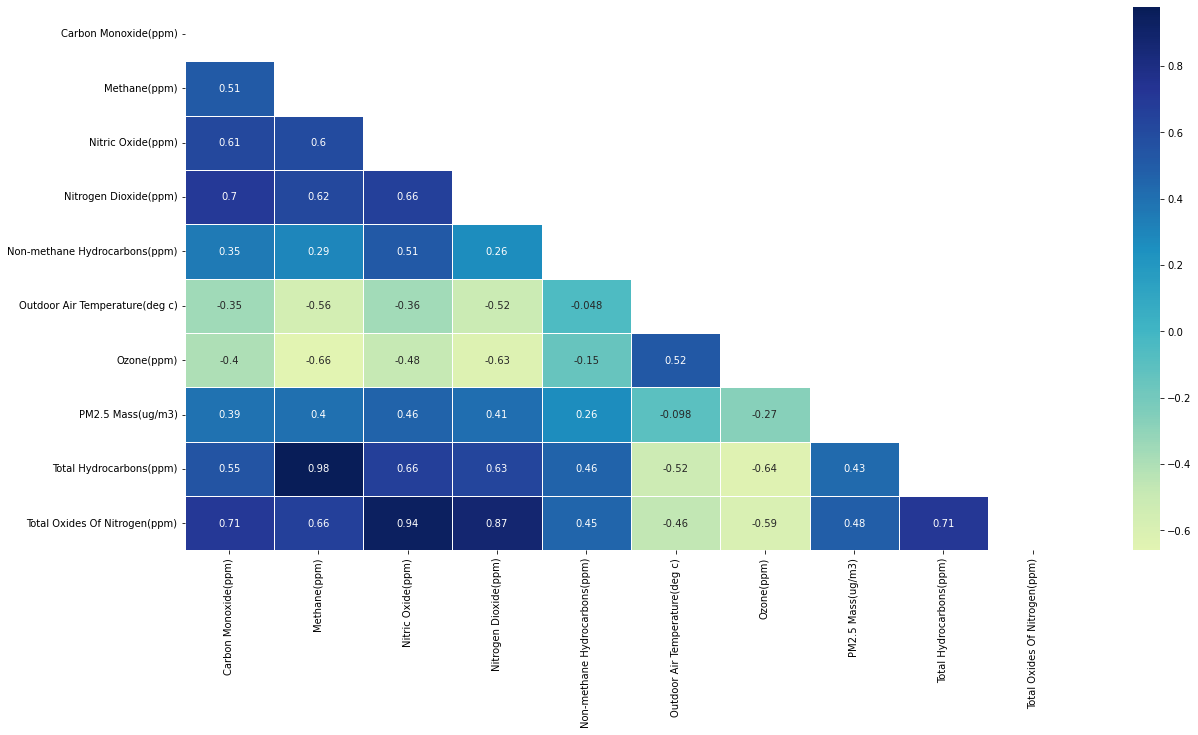

In [52]:
# Creating heatmap
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

## AQI (Air Quality Index)

Determine the concentration of each pollutant: You need to know the concentration of PM2.5, NO, and O3 in the air. This information can be obtained from local air quality monitoring stations or online resources.

Convert the pollutant concentrations into their respective AQI categories: For each pollutant, use a conversion table that shows the corresponding AQI category based on its concentration. The US Environmental Protection Agency (EPA) provides such tables for PM2.5, NO, and O3 on its website.

Identify the highest AQI category: The AQI for a particular day is determined by the pollutant with the highest AQI category. For example, if PM2.5 has an AQI of 150 and NO has an AQI of 100, the AQI for that day will be 150.

Report the AQI and associated health effects: Once you have determined the AQI, you can report it along with the associated health effects. The EPA provides a table that shows the health effects for each AQI category.

In [53]:
#df['AQI'] = df[['PM2.5 Mass(ug/m3)', 'Ozone(ppm)', 'Nitrogen Dioxide(ppm)']].max(axis=1)
#df.head(5)

In [54]:
# Define a function to calculate PM2.5 AQI
def pm25_aqi(concentration):
    if concentration <= 12.0:
        I_hi, I_lo, C_hi, C_lo = 50, 0, 12.0, 0.0
    elif concentration <= 35.4:
        I_hi, I_lo, C_hi, C_lo = 100, 51, 35.4, 12.1
    elif concentration <= 55.4:
        I_hi, I_lo, C_hi, C_lo = 150, 101, 55.4, 35.5
    elif concentration <= 150.4:
        I_hi, I_lo, C_hi, C_lo = 200, 151, 150.4, 55.5
    elif concentration <= 250.4:
        I_hi, I_lo, C_hi, C_lo = 300, 201, 250.4, 150.5
    elif concentration <= 350.4:
        I_hi, I_lo, C_hi, C_lo = 400, 301, 350.4, 250.5
    elif concentration <= 500.4:
        I_hi, I_lo, C_hi, C_lo = 500, 401, 500.4, 350.5
    else:
        return np.nan
    return round(((I_hi - I_lo) / (C_hi - C_lo)) * (concentration - C_lo) + I_lo)

# Apply the function to a dataframe column containing PM2.5 concentrations
df['PM2.5 AQI'] = df['PM2.5 Mass(ug/m3)'].apply(lambda x: pm25_aqi(x))


In [55]:
df.head(1)

,Carbon Monoxide(ppm),Methane(ppm),Nitric Oxide(ppm),Nitrogen Dioxide(ppm),Non-methane Hydrocarbons(ppm),Outdoor Air Temperature(deg c),Ozone(ppm),PM2.5 Mass(ug/m3),Total Hydrocarbons(ppm),Total Oxides Of Nitrogen(ppm),Start_date,Start_time,End_date,End_time,PM2.5 AQI
0,0.2,2.1,0.004,0.019,0.0,3.8,0.021,6.0,2.1,0.023,2015-01-01,00:00:00,2015-01-01,00:59:00,25


11899

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['PM2.5 Mass(ug/m3)', 'Nitric Oxide(ppm)', 'Ozone(ppm)']
target = 'PM2.5 AQI'

# Split the data into X and y
X = df[features].values
y = df[target].values



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=5)),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 29.655803618487706


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features = ['PM2.5 Mass(ug/m3)', 'Nitric Oxide(ppm)', 'Ozone(ppm)']
target = 'PM2.5 AQI'

# Split the data into X and y
X1 = df[features].values
y1 = df[target].values
# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=5)),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train1, y_train1)

# Make predictions on the testing data
y_pred1 = pipeline.predict(X_test1)

# Evaluate the model
mse1 = mean_squared_error(y_test1, y_pred1)
print(f"Mean Squared Error: {mse1}")


Mean Squared Error: 0.008143193277310905
